In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBacked.figure_format = 'retina'

In [112]:
df = pd.read_csv('accidental-deaths-in-usa-monthly.csv')
df.head()

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


In [113]:
df.columns

Index(['Month', 'Accidental deaths in USA: monthly, 1973 ? 1978'], dtype='object')

In [114]:
# splitting column 'month' into 'year' and 'month'
df = pd.concat([df['Month'].str.split('-', expand=True), df], axis=1)

In [115]:
df.head()

,0,1,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
0,1973,01,1973-01,9007
1,1973,02,1973-02,8106
2,1973,03,1973-03,8928
3,1973,04,1973-04,9137
4,1973,05,1973-05,10017


In [116]:
df.drop(columns=['Month'], inplace=True)
df.rename(columns={0: 'Year', 1: 'Month', 'Accidental deaths in USA: monthly, 1973 ? 1978': 'Accident Deaths'}, 
          inplace=True)
df.head()

,Year,Month,Accident Deaths
0,1973,01,9007
1,1973,02,8106
2,1973,03,8928
3,1973,04,9137
4,1973,05,10017


In [117]:
df.describe()

,Accident Deaths
count,72.000000
mean,8787.736111
std,958.338013
min,6892.000000
25%,8089.000000
50%,8728.500000
75%,9323.250000
max,11317.000000


In [118]:
# accident deaths by year
df.groupby('Year')['Accident Deaths'].sum()

Year
1973    115821
1974    104622
1975    103030
1976    100761
1977    102922
1978    105561
Name: Accident Deaths, dtype: int64

Text(0.5, 1.0, 'Total Accident Deaths each year 1973-1978')

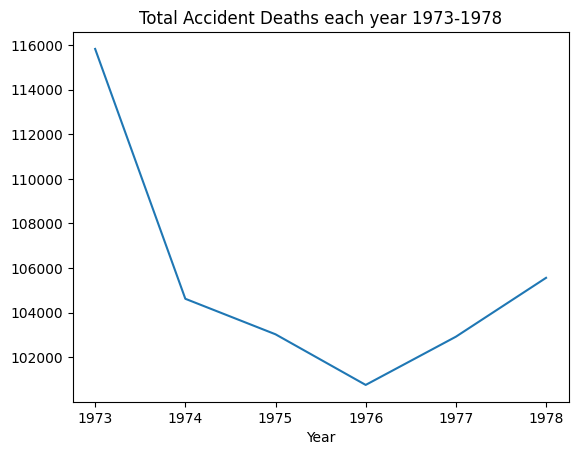

In [119]:
# plotting line plot to see trend
ax1 = df.groupby('Year')['Accident Deaths'].sum().plot(xlabel='Year')
ax1.set_title('Total Accident Deaths each year 1973-1978')

In [120]:
# in 1973, there were a lot of accident deaths, checking monthly contribution
df_1973 = df.loc[df['Year']=='1973'].reset_index(drop=True)
df_1973['% of Year'] = df_1973['Accident Deaths']/df_1973['Accident Deaths'].sum()
df_1973[['Month', '% of Year']]

,Month,% of Year
0,01,0.077767
1,02,0.069987
2,03,0.077084
3,04,0.078889
4,05,0.086487
5,06,0.093472
6,07,0.097711
7,08,0.092764
8,09,0.083862
9,10,0.085805


In [121]:
# checking YoY Accident Deaths
df_year = df.groupby('Year')['Accident Deaths'].sum().reset_index()
df_year

,Year,Accident Deaths
0,1973,115821
1,1974,104622
2,1975,103030
3,1976,100761
4,1977,102922
5,1978,105561


In [122]:
df_year['Previous Year'] = df_year['Accident Deaths'].shift()
df_year

,Year,Accident Deaths,Previous Year
0,1973,115821,NaN
1,1974,104622,115821.0
2,1975,103030,104622.0
3,1976,100761,103030.0
4,1977,102922,100761.0
5,1978,105561,102922.0


In [123]:
# calculating YoY for accidents (using entire year statistic)
df_year['YoY %'] = ((df_year['Accident Deaths']/df_year['Previous Year']) - 1)*100
df_year

,Year,Accident Deaths,Previous Year,YoY %
0,1973,115821,NaN,NaN
1,1974,104622,115821.0,-9.669231
2,1975,103030,104622.0,-1.521668
3,1976,100761,103030.0,-2.202271
4,1977,102922,100761.0,2.144679
5,1978,105561,102922.0,2.564078


Text(0.5, 1.0, 'YoY % for total Accident Deaths from 1973-1978')

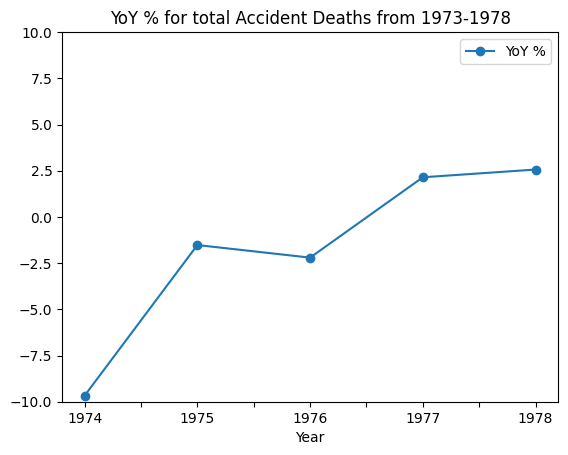

In [124]:
ax2 = df_year.plot.line(x='Year', y='YoY %', marker='o')
ax2.set_ylim(-10, 10)
ax2.set_title('YoY % for total Accident Deaths from 1973-1978')

In [126]:
# now, checking for each month from 1973 to 1978
df_pivot = df.pivot(index='Year', columns='Month', values='Accident Deaths')
df_pivot

Month,01,02,03,04,05,06,07,08,09,10,11,12
Year,,,,,,,,,,,,
1973,9007,8106,8928,9137,10017,10826,11317,10744,9713,9938,9161,8927
1974,7750,6981,8038,8422,8714,9512,10120,9823,8743,9129,8710,8680
1975,8162,7306,8124,7870,9387,9556,10093,9620,8285,8433,8160,8034
1976,7717,7461,7776,7925,8634,8945,10078,9179,8037,8488,7874,8647
1977,7792,6957,7726,8106,8890,9299,10625,9302,8314,8850,8265,8796
1978,7836,6892,7791,8129,9115,9434,10484,9827,9110,9070,8633,9240


In [130]:
# checking with months have the most and least number of accident deaths (basis of mean)
df.groupby('Month')['Accident Deaths'].mean().sort_values(ascending=False).head(1)

Month
07    10452.833333
Name: Accident Deaths, dtype: float64

In [131]:
df.groupby('Month')['Accident Deaths'].mean().sort_values().head(1)

Month
02    7283.833333
Name: Accident Deaths, dtype: float64

Text(0.5, 1.0, 'Accident Death trend for Months across 1973 to 1978')

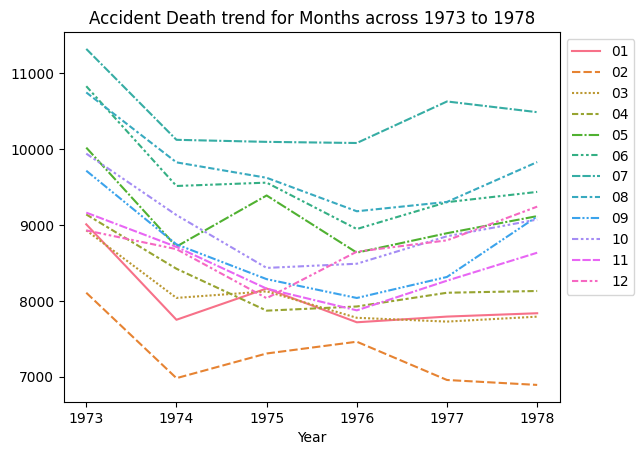

In [132]:
# plotting trend for each month
ax3 = sns.lineplot(data=df_pivot)
ax3.legend(bbox_to_anchor=(1, 1))
ax3.set_title('Accident Death trend for Months across 1973 to 1978')

In [134]:
# as per groupby query, July had most accident deaths on average
# February had least accident deaths on average
# as per lineplot for trends, July consistently had most accident deaths across all years,
# while February consistently had the least